In [60]:
import pennylane as qml
from pennylane import numpy as np

import matplotlib.pyplot as plt

# 0.9 -> fit
gamma = 0

# == Calculate coefficient of state vector ==
def coeff_state(theta):
    coeff = np.array([ ((1+np.exp(-1.j * theta))/2) * (np.sqrt(1-gamma)) , (1-np.exp(-1.j * theta))/2 ]) / (1-gamma * (np.cos(theta)**2)) 
    
    return coeff / np.sqrt( np.sum( np.abs(coeff)**2) )

In [61]:
# == Generate Q_node ==
dev_with_norm = qml.device('default.qubit', wires = 1)
@qml.qnode(dev_with_norm)
def circuit(theta):
    qml.QubitStateVector(coeff_state(theta), wires=range(1))

    
    return qml.probs()

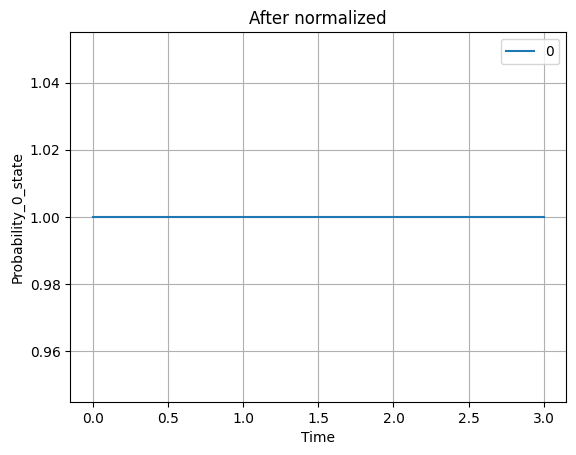

In [58]:
#  == Plot for CFI ==
N = 1000
tau_CFI = np.linspace(-0.001, 3.0, N)

CFI_numpy = np.zeros(N)

for i in range(len(tau_CFI)):
    CFI_numpy[i] = (qml.qinfo.classical_fisher(circuit)(tau_CFI[i]))
    # Casting to numpy array without gradient
    CFI_numpy[i] = round((CFI_numpy[i]).numpy(), 5)


plt.subplot()
plt.plot(tau_CFI, CFI_numpy, label = gamma)
plt.title('After normalized')
plt.xlabel('Time')
plt.ylabel('Probability_0_state')
plt.legend()
plt.grid()

In [59]:
CFI_numpy

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 